# Acceptance map that "ruins" GENIE samples to mimic the detector

In [176]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/'

In [4]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [32]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [33]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
overlay_scalings = dict()
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}
applied cuts to overlay
applied cuts to data


In [34]:
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]

In [35]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


In [278]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


In [37]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'

926088  GENIE interaction
243732 GENIE CC1p0π events


In [279]:
GENIE_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pmu_theta'])
selected_CC1p0pi_tightFV['truth_Pmu_cos_theta'] = np.cos(selected_CC1p0pi_tightFV['truth_Pmu_theta'])
overlay_tightFV['truth_Pmu_cos_theta'] = np.cos(overlay_tightFV['truth_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# afro GENIE samples with different $m_A$

In [474]:
sns.set(style='white');
mA_array = [0.80,0.90,0.99,1.10,1.20,1.40]
 # S.Dytman: GENIE assumes mA=0.99 GeV/c2 (Dec-30,2017)

In [475]:
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34849 CC1p0π events in GENIE samples with mA=0.99
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38810 CC1p0π events in GENIE samples with mA=1.40


## overlay efficiency and purity as a function of $p_\mu$ and $\theta_\mu$

In [532]:
Pmu_bins = linspace(0,2,6)
Pmu_theta_bins = linspace(0,np.pi,6)
xbins,ybins = Pmu_bins,Pmu_theta_bins
xcenters,ycenters = 0.5*(xbins[1:]+xbins[:-1]),0.5*(ybins[1:]+ybins[:-1])
nx,ny = len(xbins)-1,len(ybins)-1
xvar,yvar = 'truth_Pmu','truth_Pmu_theta'
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=["$%.1f\pi$"%(y/np.pi) for y in ycenters]
x_label,y_label=r'$p_\mu$ (GeV/c)',r'$\theta_\mu$ [rad]'

## efficiency

In [533]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi_tightFV
hgen,hacc,heff,heff_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    #print "xmin,xmax:",xmin,xmax
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        #print "ymin,ymax:",ymin,ymax        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        acc_bin = accepted[(accepted[xvar]>xmin)&(accepted[xvar]<xmax)
                            &(accepted[yvar]>ymin)&(accepted[yvar]<ymax)]
        hacc[ix][iy] = len(acc_bin)        
        heff[ix][iy] = float(hacc[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
        heff_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hgen[ix][iy] if hgen[ix][iy] else 0)
                                                + (1./hacc[ix][iy] if hacc[ix][iy] else 0) )
hgen,hacc,heff,heff_err=hgen.T,hacc.T,heff.T,heff_err.T
print 'done'

done


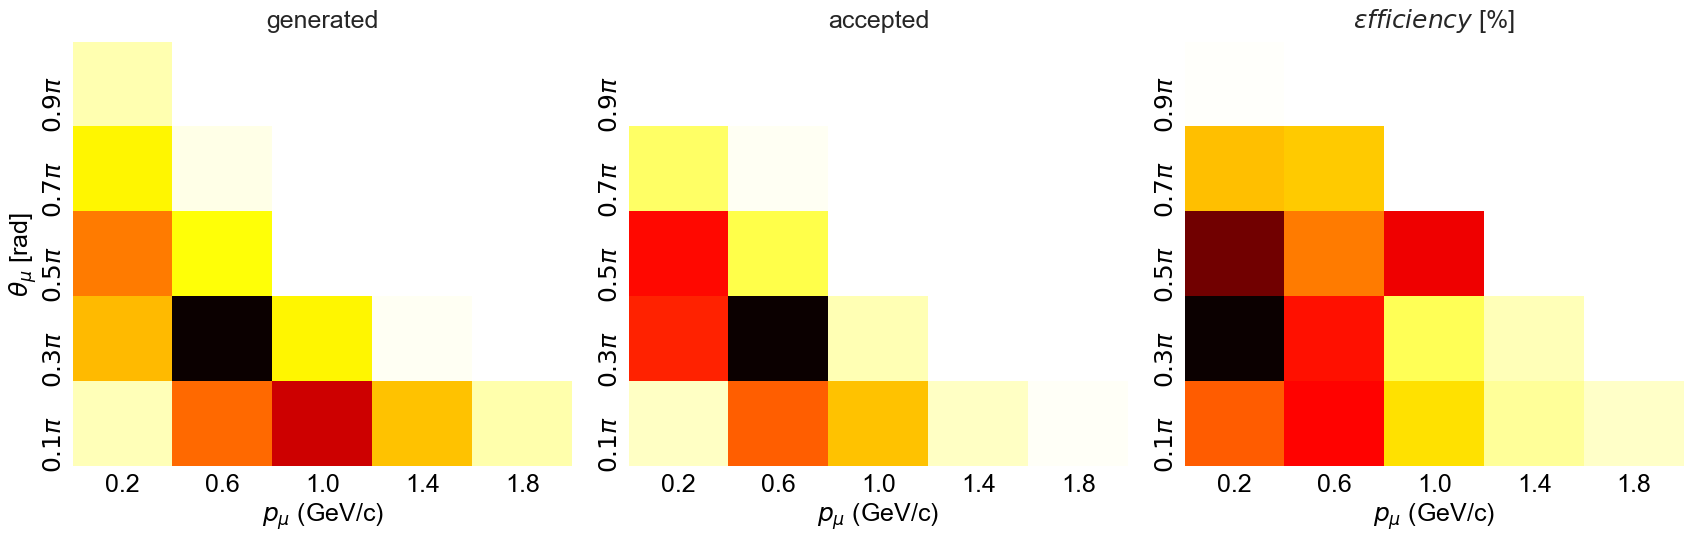

In [534]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else ''
             ,title=title)
    ax.invert_yaxis()
plt.tight_layout()

## purity

In [535]:
overlay = overlay_tightFV
cc1p0pi = selected_CC1p0pi_tightFV
hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]
        all_bin = overlay[(overlay[xvar]>xmin)&(overlay[xvar]<xmax)
                            &(overlay[yvar]>ymin)&(overlay[yvar]<ymax)]
        hall[ix][iy] = len(all_bin)        
        cc1p0pi_bin = cc1p0pi[(cc1p0pi[xvar]>xmin)&(cc1p0pi[xvar]<xmax)
                            &(cc1p0pi[yvar]>ymin)&(cc1p0pi[yvar]<ymax)]
        hcc1p0pi[ix][iy] = len(cc1p0pi_bin)  
        
        hpur[ix][iy] = float(hcc1p0pi[ix][iy])/(hall[ix][iy] if hall[ix][iy]>0 else 1)                
        hpur_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hall[ix][iy] if hall[ix][iy] else 0)
                                                + (1./hcc1p0pi[ix][iy] if hcc1p0pi[ix][iy] else 0) )

hall,hcc1p0pi,hpur,hpur_err = hall.T,hcc1p0pi.T,hpur.T,hpur_err.T
print 'done'

done


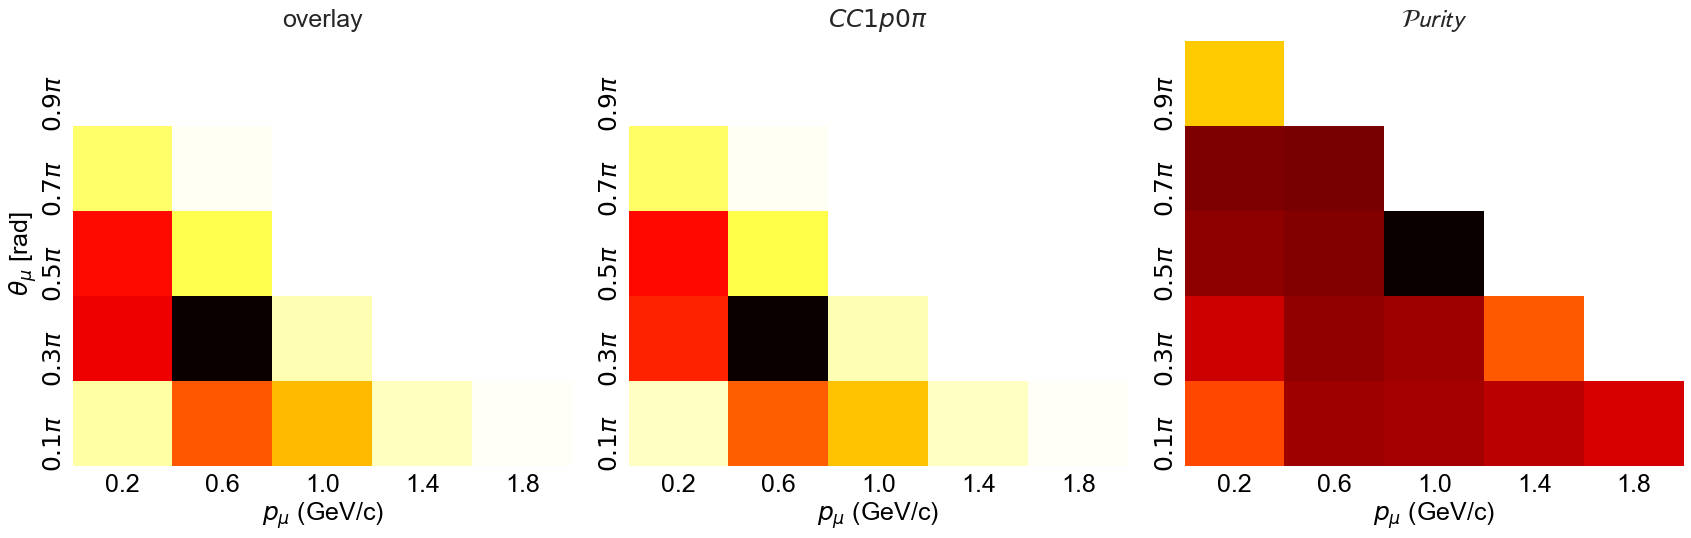

In [536]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else ''
             ,title=title
            )
    ax.invert_yaxis()
plt.tight_layout()

In [537]:
hacc = np.zeros((nx,ny))
herr = np.zeros((nx,ny))
herr_rel = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        hacc[ix][iy] = heff[ix][iy]/(hpur[ix][iy] if hpur[ix][iy]>0 else 1)
        herr[ix][iy] = hacc[ix][iy]*np.sqrt( np.square(heff_err[ix][iy]/heff[ix][iy] if heff[ix][iy] else 0) 
                                            + np.square(hpur_err[ix][iy]/hpur[ix][iy] if hpur[ix][iy] else 0) )
        herr_rel[ix][iy] = herr[ix][iy]/hacc[ix][iy] if hacc[ix][iy]>0 else 0
print 'done'

done


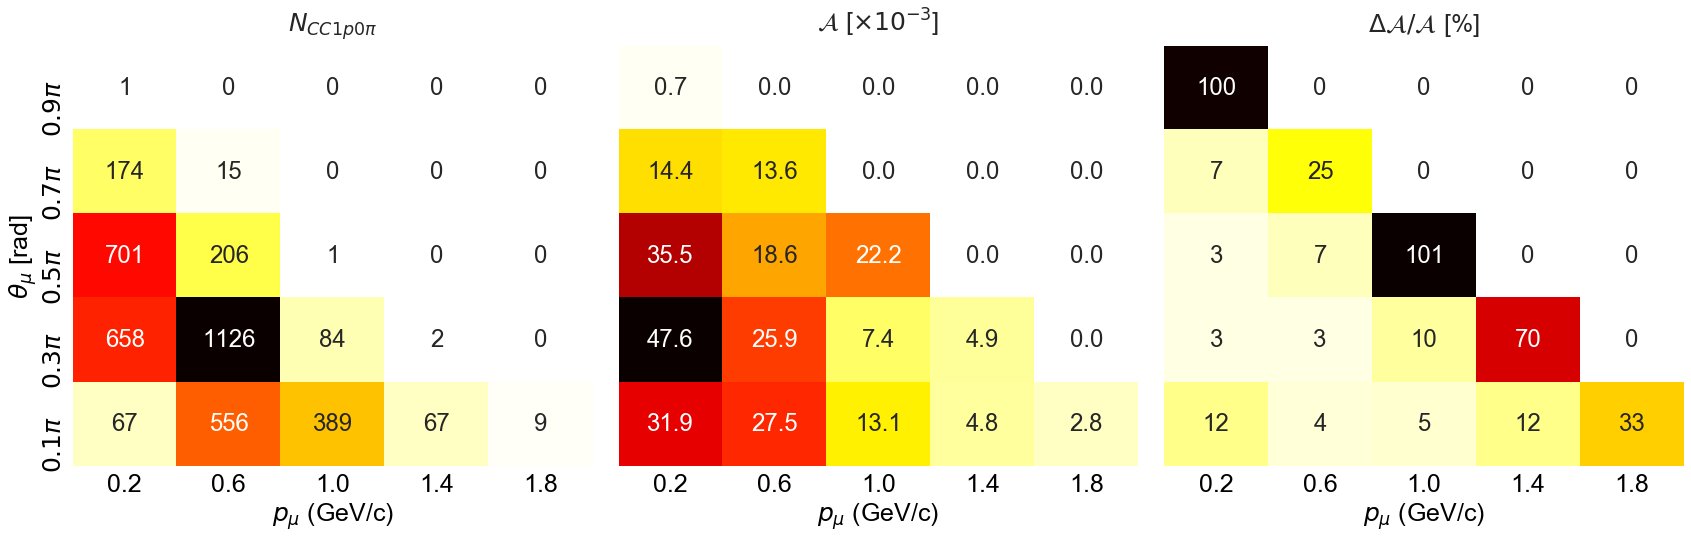

In [538]:
fig = plt.figure(figsize=(24,8))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc,100.*herr_rel]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-3}$]',r'$\Delta \mathcal{A} / \mathcal{A}$ [%]'])):
    ax = fig.add_subplot(1,3,ih+1)
    sns.heatmap( h.astype(np.int) if ih!=1 else 1000*h
                ,annot=True
                ,cmap='hot_r'
                ,fmt="d" if ih!=1 else ".1f"
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if ih==0 else '',remove_ticks_y=False if ih==0 else True,title=title)    
    ax.invert_yaxis()
plt.tight_layout()

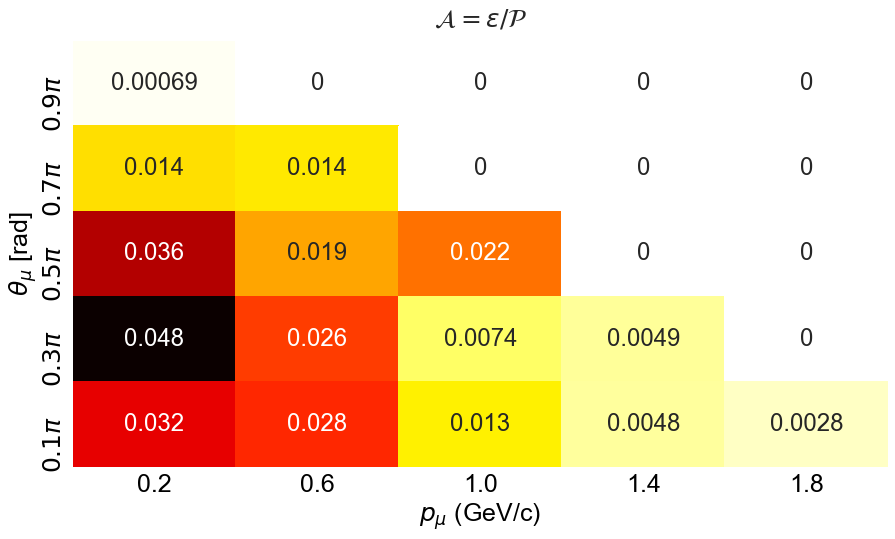

In [539]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(hacc,annot=True,cmap='hot_r'
                ,xticklabels=xticklabels
                ,yticklabels=yticklabels
                ,cbar=False)
set_axes(ax,x_label,y_label,title=r'$\mathcal{A} = \varepsilon/\mathcal{P}$')
ax.invert_yaxis()
plt.tight_layout()

## save into a csv file

In [540]:
mapname='Pmu_theta'
for array,name in zip([xbins,ybins,hacc,herr]
                      ,['xbins','ybins','acceptance','acc_err']):
    print name,':',array
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%dx%d_bins_%s.csv"%(mapname,nx,ny,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

xbins : [ 0.   0.4  0.8  1.2  1.6  2. ]
saved xbins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_5x5_bins_xbins.csv
ybins : [ 0.          0.62831853  1.25663706  1.88495559  2.51327412  3.14159265]
saved ybins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_5x5_bins_ybins.csv
acceptance : [[ 0.03190153  0.02751693  0.01309863  0.00481787  0.00281081]
 [ 0.04759702  0.02594656  0.00737453  0.00494438  0.        ]
 [ 0.03552514  0.01858955  0.02222222  0.          0.        ]
 [ 0.01440568  0.01362604  0.          0.          0.        ]
 [ 0.00069156  0.          0.          0.          0.        ]]
saved acceptance into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pmu_theta_5x5_bins_acceptance.csv
acc_err : [[ 0.00393306  0.00118134  0.00066827  0.00058977  0.00093785]
 [ 0.00188806  0.00078166  0.0008072   0.00350187  0.        ]
 [ 0.00136098  0.00130506  0.02247863  0.          0.  

## now run calculation of weights on GENIE samples:
> make && python mac/genie_to_csv.py -mA=0.99 -evf=1

# now extract $m_A$ from the $Q^2$ distribution

In [541]:
def add_GENIE(mA=0.99,var='Q2',do_add_weights=True,Integral_OnBeam=1,bins=None,color='black'):
    x = genie_CC1p0pi[mA][var]
    MicroBooNEWeights = genie_CC1p0pi[mA]['MicroBooNEWeight_Pmu_PmuTheta']
    if do_add_weights: hGenie,edges = np.histogram(x,weights=MicroBooNEWeights,bins=bins)
    else: hGenie,edges = np.histogram(x,bins=bins)
    hGenie_err = np.sqrt(hGenie)*(Integral_OnBeam/np.float(np.sum(hGenie)))
    hGenie = hGenie*(Integral_OnBeam/np.float(np.sum(hGenie)))
    chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                         , h1=h_OnBeam , h1err=h_OnBeam_err
                                         , h2=hGenie ,  h2err=hGenie_err, debug=0 )
    hGenie = hGenie*(Integral_OnBeam/np.float(np.sum(hGenie)))
    plt.step(x=mid , y=hGenie , where='mid' ,color=color, label=('$m_A=%.2f$, '%mA
                                                                 + ('' if do_add_weights==True else 'no')
                                                                 + r' $\mu$B weights, $\chi^2/ndf=%.1f/%d$'%(chi2,ndf)))

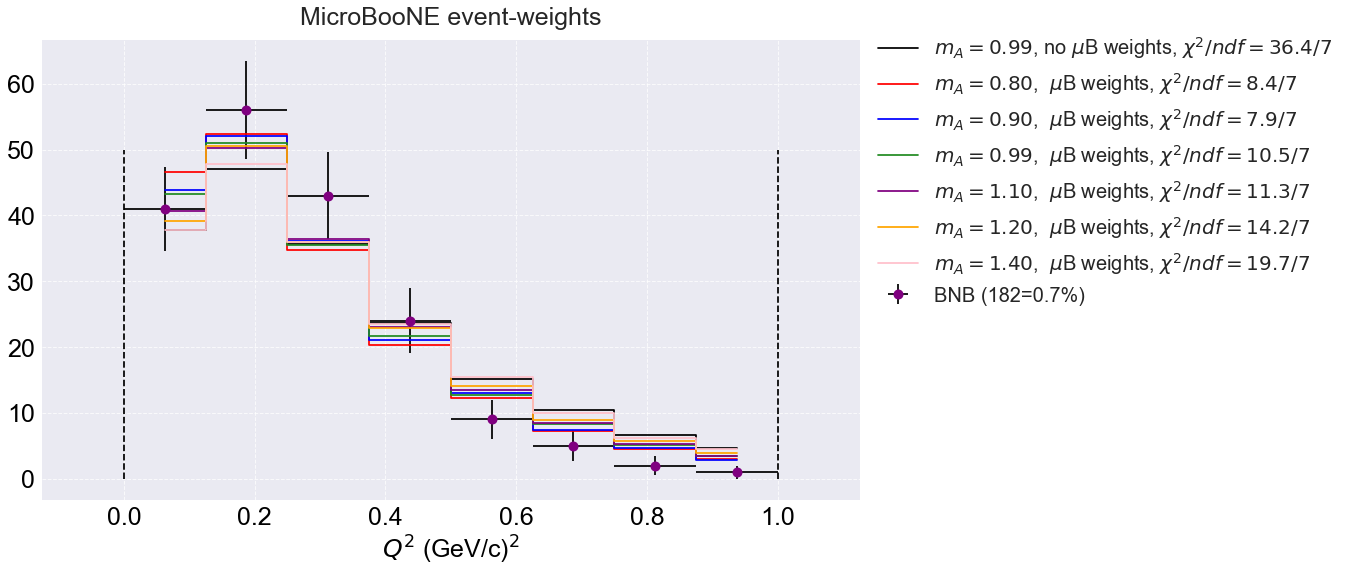

In [542]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0,1,9); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange=(0,1)
x_label=r'$Q^2$ (GeV/c)$^2$'

_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events_tightFV,var='reco_Q2',
                         OnBeamFV=OnBeamFV,markersize=10,color='purple', bins=bins, ax=ax)
h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
Integral_OnBeam = np.float(np.sum(h_OnBeam))
add_GENIE(mA=0.99,do_add_weights=False,Integral_OnBeam=Integral_OnBeam,bins=bins,color='black')
for mA,color in zip(mA_array
                    ,['red','blue','forestgreen','purple','orange','pink']):
    add_GENIE(mA=mA,do_add_weights=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color=color)
    if mA==0.99:
        ylim = (0,50)
        plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
set_axes(ax,x_label,'',do_add_grid=True,title='MicroBooNE event-weights')
plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)

## overlay efficiency and purity as a function of $p_p$ and $\theta_p$

In [543]:
Pp_bins = linspace(0,1.4,8)
Pp_theta_bins = linspace(0,np.pi,8)
xbins,ybins = Pp_bins,Pp_theta_bins
xcenters,ycenters = 0.5*(xbins[1:]+xbins[:-1]),0.5*(ybins[1:]+ybins[:-1])
nx,ny = len(xbins)-1,len(ybins)-1
xvar,yvar = 'truth_Pp','truth_Pp_theta'
xticklabels=["%.1f"%x for x in xcenters]
yticklabels=["$%.1f\pi$"%(y/np.pi) for y in ycenters]
x_label,y_label=r'$p_p$ (GeV/c)',r'$\theta_p$ [rad]'

## efficiency

In [544]:
generated = GENIE_CC1p0pi
accepted = selected_CC1p0pi_tightFV
hgen,hacc,heff,heff_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]    #print "xmin,xmax:",xmin,xmax
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]        #print "ymin,ymax:",ymin,ymax        
        gen_bin = generated[(generated[xvar]>xmin)&(generated[xvar]<xmax)
                            &(generated[yvar]>ymin)&(generated[yvar]<ymax)]
        hgen[ix][iy] = len(gen_bin)        
        acc_bin = accepted[(accepted[xvar]>xmin)&(accepted[xvar]<xmax)
                            &(accepted[yvar]>ymin)&(accepted[yvar]<ymax)]
        hacc[ix][iy] = len(acc_bin)        
        heff[ix][iy] = float(hacc[ix][iy])/(hgen[ix][iy] if hgen[ix][iy]>0 else 1)
        heff_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hgen[ix][iy] if hgen[ix][iy] else 0)
                                                + (1./hacc[ix][iy] if hacc[ix][iy] else 0) )
hgen,hacc,heff,heff_err=hgen.T,hacc.T,heff.T,heff_err.T
print 'done'

done


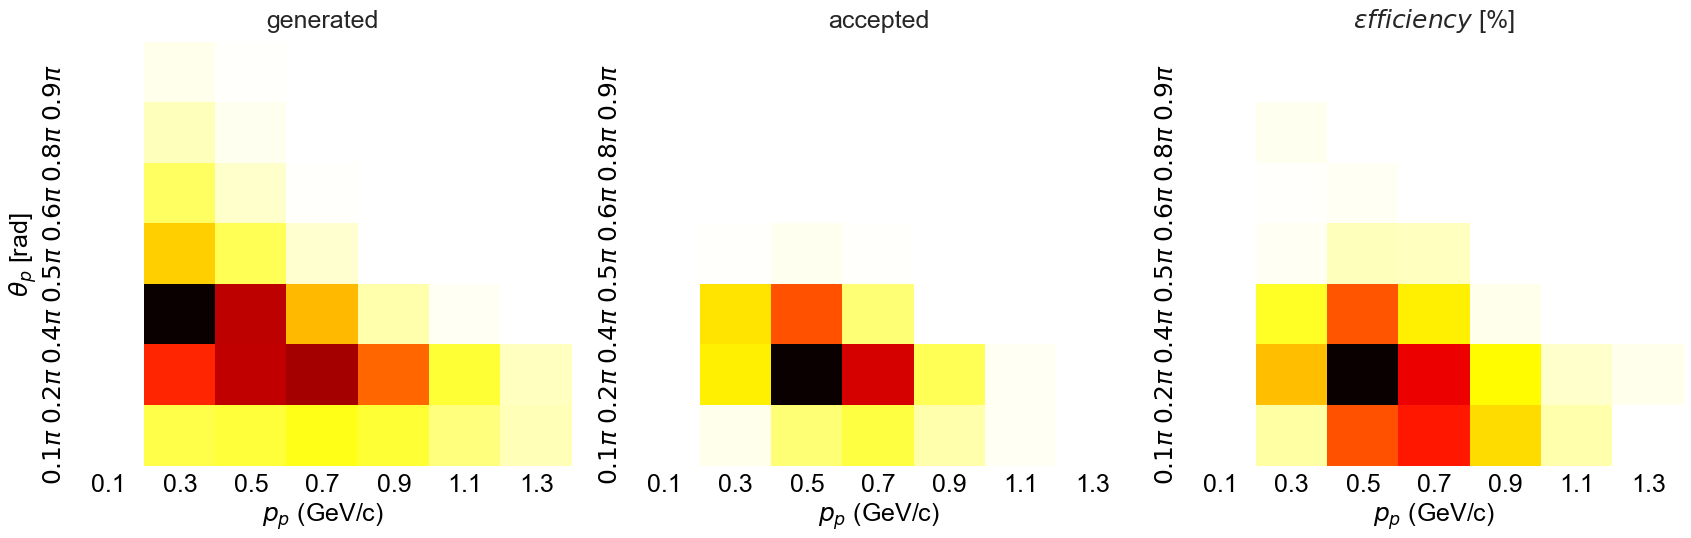

In [545]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hgen,hacc,heff],['generated','accepted','$\epsilon fficiency$ [%]'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else ''
             ,title=title)
    ax.invert_yaxis()
plt.tight_layout()

## purity

In [546]:
overlay = overlay_tightFV
cc1p0pi = selected_CC1p0pi_tightFV
hall,hcc1p0pi,hpur,hpur_err = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    xmin,xmax = xbins[ix],xbins[ix+1]
    for iy in range(ny):
        ymin,ymax = ybins[iy],ybins[iy+1]
        all_bin = overlay[(overlay[xvar]>xmin)&(overlay[xvar]<xmax)
                            &(overlay[yvar]>ymin)&(overlay[yvar]<ymax)]
        hall[ix][iy] = len(all_bin)        
        cc1p0pi_bin = cc1p0pi[(cc1p0pi[xvar]>xmin)&(cc1p0pi[xvar]<xmax)
                            &(cc1p0pi[yvar]>ymin)&(cc1p0pi[yvar]<ymax)]
        hcc1p0pi[ix][iy] = len(cc1p0pi_bin)          
        hpur[ix][iy] = float(hcc1p0pi[ix][iy])/(hall[ix][iy] if hall[ix][iy]>0 else 1)                
        hpur_err[ix][iy] = heff[ix][iy]*np.sqrt( (1./hall[ix][iy] if hall[ix][iy] else 0)
                                                + (1./hcc1p0pi[ix][iy] if hcc1p0pi[ix][iy] else 0) )

hall,hcc1p0pi,hpur,hpur_err = hall.T,hcc1p0pi.T,hpur.T,hpur_err.T
print 'done'

done


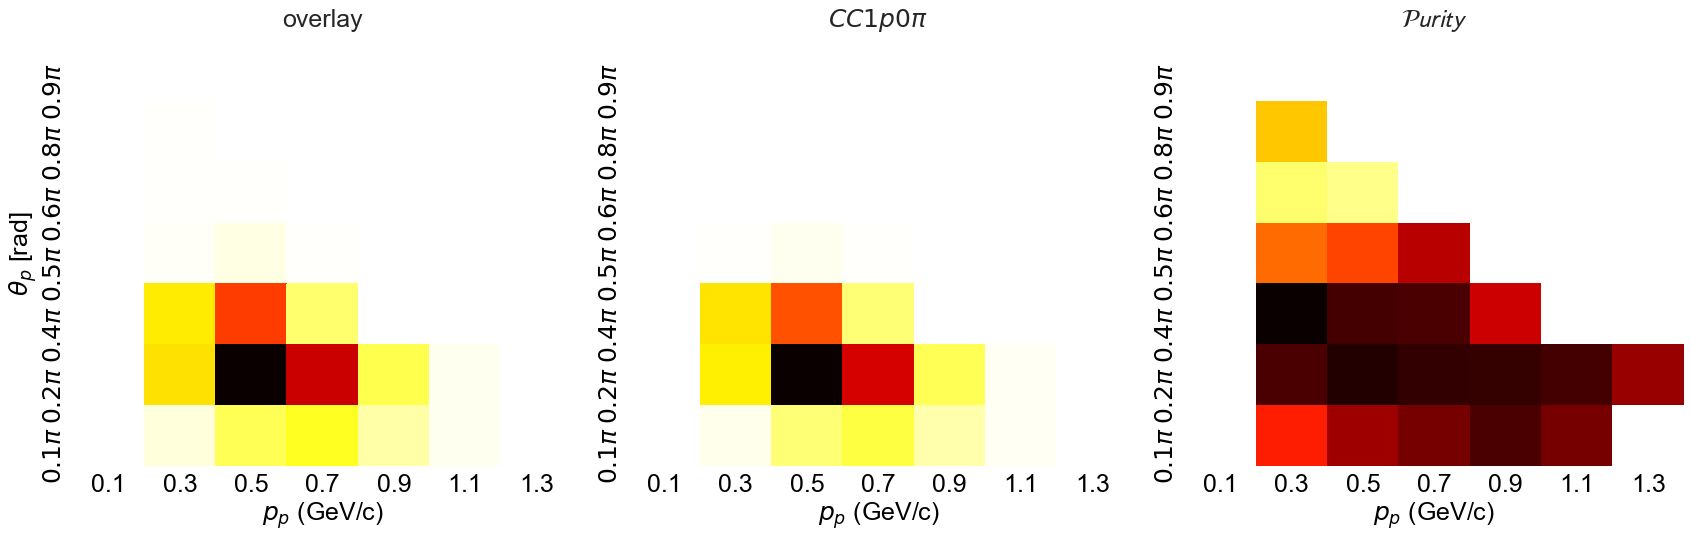

In [547]:
fig = plt.figure(figsize=(24,8))
sns.set(font_scale=2);
for i,(h,title) in enumerate(zip([hall,hcc1p0pi,hpur],['overlay','$CC1p0\pi$','$\mathcal{Purity}$'])):
    ax = fig.add_subplot(1,3,i+1)
    sns.heatmap(h,annot=False,cmap='hot_r'
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if i==0 else '',title=title)
    ax.invert_yaxis()
plt.tight_layout()

In [548]:
hacc,herr,herr_rel = np.zeros((nx,ny)),np.zeros((nx,ny)),np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        hacc[ix][iy] = heff[ix][iy]/(hpur[ix][iy] if hpur[ix][iy]>0 else 1)
        herr[ix][iy] = hacc[ix][iy]*np.sqrt( np.square(heff_err[ix][iy]/heff[ix][iy] if heff[ix][iy] else 0) 
                                            + np.square(hpur_err[ix][iy]/hpur[ix][iy] if hpur[ix][iy] else 0) )
        herr_rel[ix][iy] = herr[ix][iy]/hacc[ix][iy] if hacc[ix][iy]>0 else 0
print 'done'

done


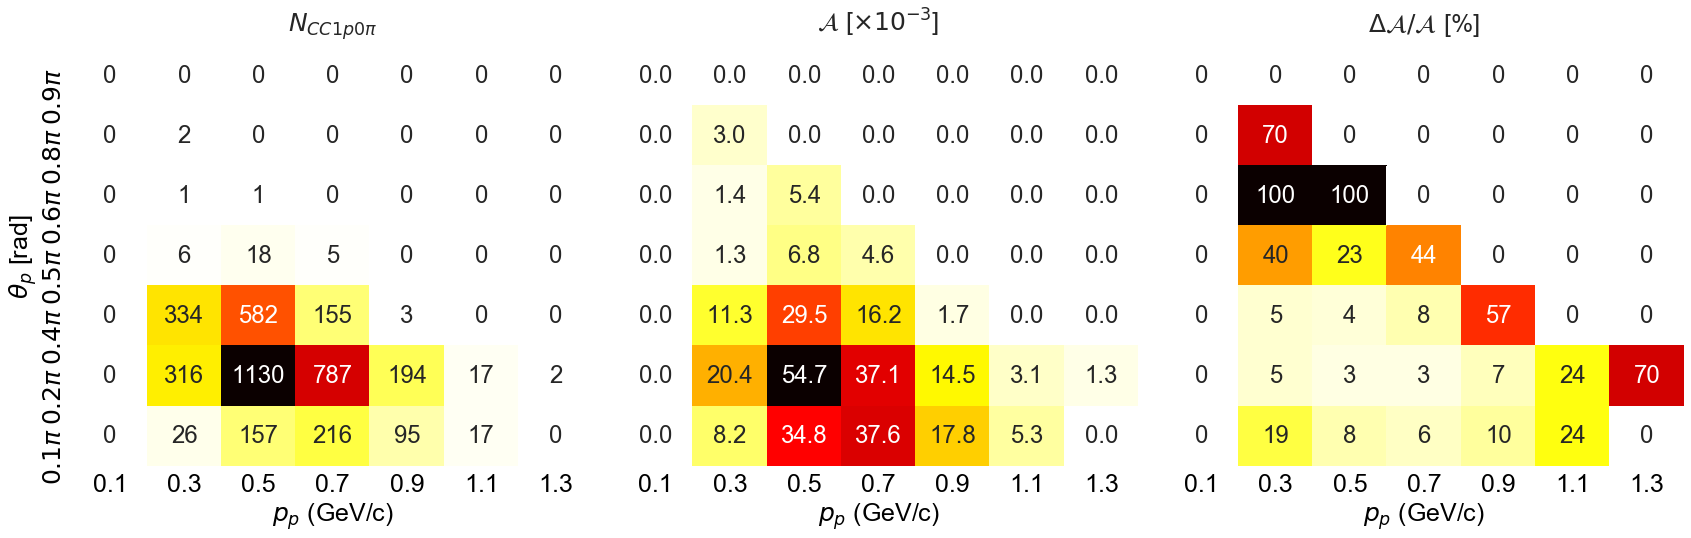

In [549]:
fig = plt.figure(figsize=(24,8))
for ih,(h,title) in enumerate(zip([hcc1p0pi,hacc,100.*herr_rel]
                                  ,[r'$N_{CC1p0\pi}$',r'$\mathcal{A}$ [$\times 10^{-3}$]',r'$\Delta \mathcal{A} / \mathcal{A}$ [%]'])):
    ax = fig.add_subplot(1,3,ih+1)
    sns.heatmap( h.astype(np.int) if ih!=1 else 1000*h
                ,annot=True
                ,cmap='hot_r'
                ,fmt="d" if ih!=1 else ".1f"
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
    set_axes(ax,x_label,y_label if ih==0 else '',remove_ticks_y=False if ih==0 else True,title=title)    
    ax.invert_yaxis()
plt.tight_layout()

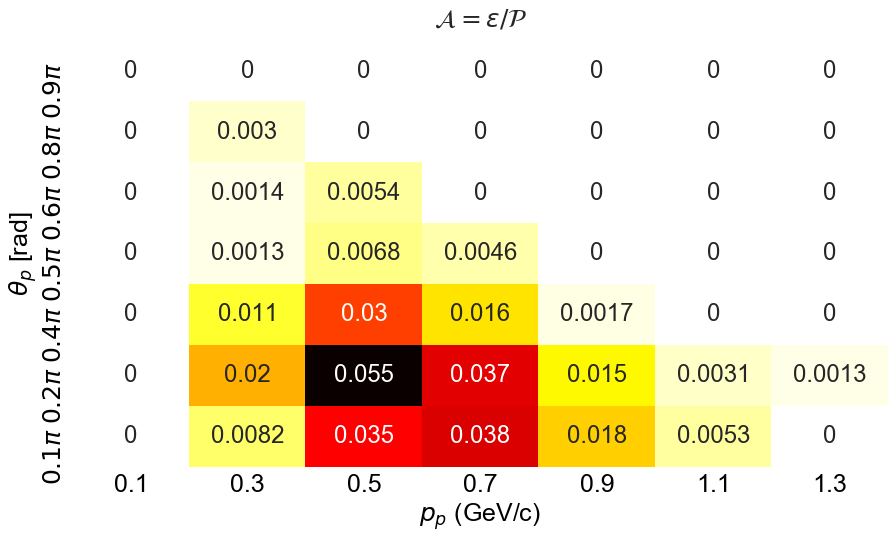

In [550]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(hacc,annot=True,cmap='hot_r'
                ,xticklabels=xticklabels,yticklabels=yticklabels,cbar=False)
set_axes(ax,x_label,y_label,title=r'$\mathcal{A} = \varepsilon/\mathcal{P}$')
ax.invert_yaxis()
plt.tight_layout()

## save into a csv file

In [551]:
mapname='Pp_theta'
for array,name in zip([xbins,ybins,hacc,herr]
                      ,['xbins','ybins','acceptance','acc_err']):
    print name,':',array
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%dx%d_bins_%s.csv"%(mapname,nx,ny,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

xbins : [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4]
saved xbins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_7x7_bins_xbins.csv
ybins : [ 0.          0.44879895  0.8975979   1.34639685  1.7951958   2.24399475
  2.6927937   3.14159265]
saved ybins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Pp_theta_7x7_bins_ybins.csv
acceptance : [[ 0.          0.00817867  0.03475467  0.03764503  0.0178033   0.00527937
   0.        ]
 [ 0.          0.02044959  0.05473029  0.03706199  0.01451594  0.00314735
   0.00133929]
 [ 0.          0.01133266  0.0295499   0.01622183  0.0016756   0.          0.        ]
 [ 0.          0.00132263  0.00678311  0.00461361  0.          0.          0.        ]
 [ 0.          0.00143421  0.00537924  0.          0.          0.          0.        ]
 [ 0.          0.00295234  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.         

## now extract $m_A$ from the distribution of $p_p$

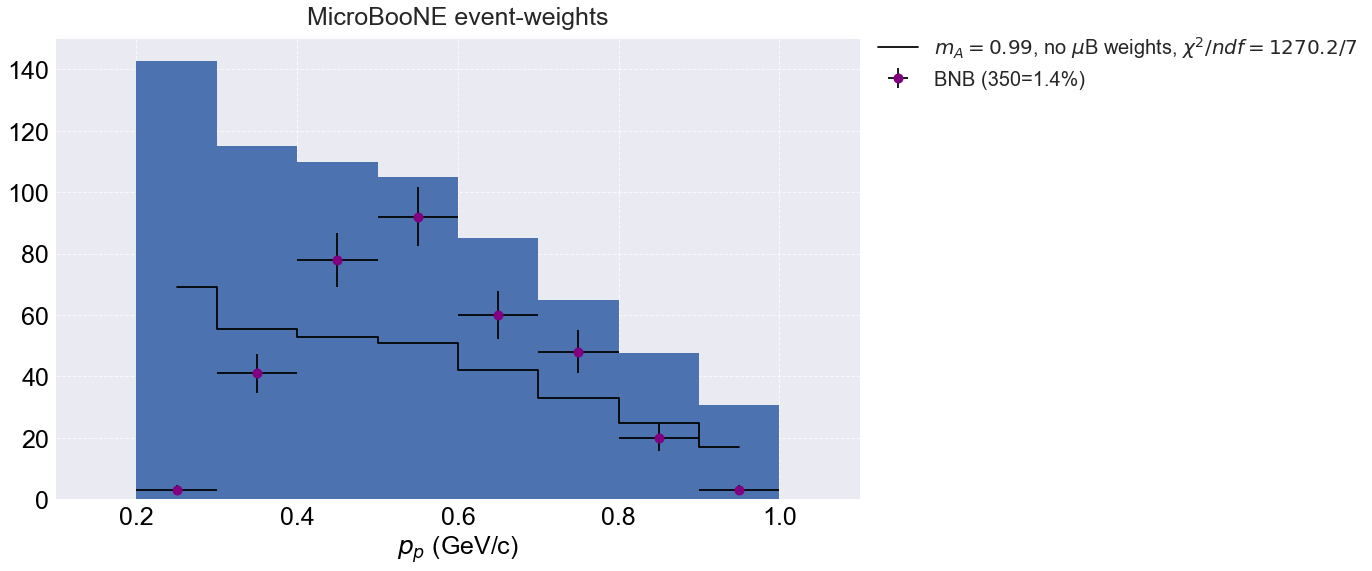

In [530]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0.2,1,9); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange=(0.2,1)
x_label=r'$p_p$ (GeV/c)'

_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,var='reco_Pp',
                         OnBeamFV=OnBeamFV,markersize=10,color='purple', bins=bins, ax=ax)
h_OnBeam_err = np.array([np.max([1,np.sqrt(h_OnBeam[i])]) for i in range(len(h_OnBeam))])
Integral_OnBeam = np.float(np.sum(h_OnBeam))
add_GENIE(mA=0.99,var='Pp',do_add_weights=False,Integral_OnBeam=Integral_OnBeam,bins=bins,color='black')
plt.hist(genie_CC1p0pi[0.99]['Pp'],weights=genie_CC1p0pi[0.99]['MicroBooNEWeight_Pmu_PmuTheta'],bins=bins)
# for mA,color in zip(mA_array
#                     ,['red','blue','forestgreen','purple','orange','pink']):
#     add_GENIE(mA=mA,var='Pp',do_add_weights=True,Integral_OnBeam=Integral_OnBeam,bins=bins,color=color)
#     if mA==0.99:
#         ylim = (0,50)
#         plt.plot([chi2_xrange[0],chi2_xrange[0]],ylim,'--',[chi2_xrange[1],chi2_xrange[1]],ylim,'--',color='black')
set_axes(ax,x_label,'',do_add_grid=True,title='MicroBooNE event-weights')
plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)